<a href="https://colab.research.google.com/github/APANDEY2201/NewsGroupIdentification_SSL/blob/main/POC_newsgroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

class_names = newsgroups_train.target_names

In [3]:
# Finding frequency of each category
targets, frequency = np.unique(newsgroups_train.target, return_counts=True)
targets_str = np.array(newsgroups_train.target_names)

In [4]:
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [5]:
#newsgroups_train['data'][1]

In [6]:
#type(newsgroups_train)

In [7]:
#type(newsgroups_train['data'])

In [8]:
newsgroups_train_df = pd.DataFrame({'data': newsgroups_train.data, 'target': newsgroups_train.target})

In [9]:
#newsgroups_train_df

In [10]:
# from sklearn.model_selection import train_test_split

# newsgroups_split_train, newsgroups_split_test = train_test_split(newsgroups_train_df,train_size = 0.7, random_state = 42, shuffle = True)
# newsgroups_split_test = newsgroups_split_train.drop('target', axis = 1)
# newsgroups_train_df = pd.concat([newsgroups_split_train, newsgroups_split_test], axis=0)

## Preprocessing

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
#stopwords_english = []
stopwords_nltk = stopwords.words('english')
#print('stopwords_nltk: \n',stopwords_nltk)
lemmatizer = WordNetLemmatizer()
stopwords_english = ([lemmatizer.lemmatize(word) for word in stopwords_nltk])
#print('stopwords_english: \n',stopwords_english)


In [13]:
def lemmed_token_generator(text_data):
  #print(type(text_data))
  #lemmed_tokens = []
  nltk_tokens = nltk.word_tokenize(text_data)
  lemmatizer = WordNetLemmatizer()
  lemmed_tokens = ([lemmatizer.lemmatize(word) for word in nltk_tokens])
  return lemmed_tokens

In [14]:
def stopword_removal(text_data):
  #text_data = list(text_data)
  #print('text_data: ',text_data)
  #text_data = list(text_data)
  stopword_filtered = []
  stopword_filtered_str = ''
  for t in text_data:
    if t not in stopwords_english and len(t)>2:
      stopword_filtered.append(t)

  stopword_filtered_str = ' '.join([i for i in stopword_filtered])
  #print('Stopword_filtered: ', stopword_filtered)  
  return stopword_filtered_str


In [15]:
#newsgroups_train_df = newsgroups_train_df.head(2)

In [16]:
newsgroups_train_df.head(2)

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4


In [17]:
newsgroups_train_df['data'] = newsgroups_train_df.apply((lambda x: newsgroups_train_df['data'].str.lower()), axis=0)
newsgroups_train_df['data'] = newsgroups_train_df.data.str.replace('[^a-zA-Z]', ' ')
newsgroups_train_df['data'] = newsgroups_train_df['data'].apply(lemmed_token_generator)
newsgroups_train_df['data'] = newsgroups_train_df['data'].apply(stopword_removal)
newsgroups_train_df.head(2)

,data,target
0,wondering anyone could enlighten car saw day d...,7
1,fair number brave soul upgraded clock oscillat...,4


## Bigrams (Bag of Words)

#### **newsgroups_train_df** has clean data

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def bow_features(train_data):
    # Bag-of-words representation
    bigram_bow_vectorize = CountVectorizer(ngram_range=(1,2), min_df=1)
    bigram_bow_train = bigram_bow_vectorize.fit_transform(train_data.data) #bag-of-word features for training data
    #bow_test = bow_vectorize.transform(test_data.data)
    feature_names = bigram_bow_vectorize.get_feature_names() #converts feature index to the word it represents.
    shape = bigram_bow_train.shape
    #print('{} train data points.'.format(shape[0]))
    #print('{} feature dimension.'.format(shape[1]))
    #print('Most common word in training set is "{}"'.format(feature_names[bow_train.sum(axis=0).argmax()]))
    return bigram_bow_train, feature_names

In [19]:
bow_train, feature_names = bow_features(newsgroups_train_df)

In [52]:
bow_train

In [21]:
# for i in bow_train:
#   print(i)

In [55]:
bigram_bow_df = pd.DataFrame.sparse.from_spmatrix(bow_train)

In [56]:
bigram_bow_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,802208,802209,802210,802211,802212,802213,802214,802215,802216,802217,802218,802219,802220,802221,802222,802223,802224,802225,802226,802227,802228,802229,802230,802231,802232,802233,802234,802235,802236,802237,802238,802239,802240,802241,802242,802243,802244,802245,802246,802247
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [24]:
def tf_idf_features(train_data):
    # Bag-of-words representation
    tf_idf_vectorize = TfidfVectorizer(ngram_range=(1, 2))
    tf_idf_train = tf_idf_vectorize.fit_transform(train_data.data) #bag-of-word features for training data
    feature_names = tf_idf_vectorize.get_feature_names() #converts feature index to the word it represents.
    #tf_idf_test = tf_idf_vectorize.transform(test_data.data)
   # print(tf_idf_train)
    return tf_idf_train, feature_names

In [ ]:
tf_idf_train, feature_names_tf_idf = tf_idf_features(newsgroups_train_df)
#print(tf_idf_train)
#print('-----')
#print(feature_names_tf_idf)


In [43]:
tf_idf_train

<11314x802248 sparse matrix of type '<class 'numpy.float64'>'
	with 1706805 stored elements in Compressed Sparse Row format>

In [57]:
tf_idf_df = pd.DataFrame.sparse.from_spmatrix(tf_idf_train)

In [58]:
tf_idf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,802208,802209,802210,802211,802212,802213,802214,802215,802216,802217,802218,802219,802220,802221,802222,802223,802224,802225,802226,802227,802228,802229,802230,802231,802232,802233,802234,802235,802236,802237,802238,802239,802240,802241,802242,802243,802244,802245,802246,802247
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word 2 vec

In [29]:
from gensim.models import Word2Vec, Phrases

In [30]:
## No change done, No Model Training Code
def w2v(feature_names):
  #feature_names = list(feature_names)
  n = 5
  list_of_lists = [feature_names[i:i + n] for i in range(0, len(feature_names), n)]
  print(list_of_lists)

  model = Word2Vec(list_of_lists, size=300, min_count=1, workers=4)
  # model['browser']
  # model.similar_by_word('anarchist')

  return model

## LDA

In [31]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

def lda_feature(bow_data):
  n_top_words = 20
  lda = LatentDirichletAllocation(n_components=20, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

  #tf_feature_names = tf_vectorizer.get_feature_names()
  lda.fit(bow_data)
  return lda
#  plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [32]:
lda_model = lda_feature(bow_train)

In [33]:
lda_features_df = pd.DataFrame(lda_model.components_)

In [34]:
lda_features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,802208,802209,802210,802211,802212,802213,802214,802215,802216,802217,802218,802219,802220,802221,802222,802223,802224,802225,802226,802227,802228,802229,802230,802231,802232,802233,802234,802235,802236,802237,802238,802239,802240,802241,802242,802243,802244,802245,802246,802247
0,0.050024,0.050020,0.050023,0.050017,0.050019,0.050020,0.050021,0.050020,0.050020,0.050020,0.050023,0.050019,0.050015,0.050021,0.050024,0.050040,0.050023,0.050023,0.050018,0.050016,0.050022,0.050022,0.050017,0.050017,0.050018,0.050018,0.050016,0.050019,0.050018,0.050020,0.050019,0.050020,0.050018,0.050019,0.050018,0.050016,0.050016,0.050020,0.050030,0.050022,...,0.050019,0.050021,0.050020,0.050019,0.050020,0.050022,0.050020,0.050025,0.050024,0.050026,0.050020,0.050020,0.050019,0.050017,0.050024,0.050017,0.050019,0.050021,0.050019,0.050020,0.050019,0.050019,0.050018,0.050019,0.050019,0.050020,0.050016,0.050021,0.050025,0.050018,0.050018,0.050021,0.050026,0.050023,0.050020,0.050017,0.050017,0.050017,0.050018,0.833107
1,0.050019,0.050022,0.050019,0.050018,0.050019,0.050022,0.050017,0.050023,0.050016,0.050017,0.050019,0.050019,0.050020,0.050022,0.050020,0.050017,0.050022,0.050018,0.050023,0.050021,0.050022,0.050016,0.050021,0.050022,0.050020,0.050019,0.050081,0.050024,0.050019,0.050020,0.050416,0.050244,0.050020,0.050020,0.050017,0.050022,0.050020,0.050019,0.050018,0.050019,...,0.050058,0.050222,0.050277,0.050021,0.050019,0.050019,0.050020,0.050026,0.050028,0.050028,0.050030,0.050023,0.050020,0.050022,0.050019,0.050019,0.050019,0.050018,0.050018,0.050032,0.050029,0.050022,0.050021,0.050026,0.050030,0.050019,0.050019,0.050045,0.050044,0.050021,0.050022,0.050024,0.051158,0.588495,0.050018,0.050019,0.050019,0.050022,0.050018,0.050044
2,0.050020,0.993705,0.050015,0.050018,0.050016,0.050021,0.050020,0.050077,0.050021,0.050018,0.050018,0.050019,0.050022,0.050018,0.050019,0.050019,0.050018,0.050022,0.050016,0.050020,0.050019,0.050022,0.050021,0.050017,0.050017,0.050020,0.050017,0.050018,0.050021,0.050018,0.050019,0.050019,0.050021,0.050018,0.050015,0.050016,0.052564,0.065407,0.050020,0.050022,...,0.050034,0.050053,0.050040,0.050023,0.050020,0.050020,0.050025,0.050019,0.050025,0.050027,0.050021,0.050019,0.050017,0.050018,0.050019,0.050020,0.050019,0.050018,0.050021,0.050020,0.050023,0.050024,0.050018,0.050020,0.050029,0.050019,0.050019,0.050031,0.050033,0.050019,0.050020,0.050019,0.050032,0.050028,0.050827,0.050021,0.050024,0.050021,0.050019,0.050022
3,0.050019,0.050022,0.050021,0.909234,0.050020,0.050018,0.050018,0.050023,0.050021,0.050020,0.050019,0.050017,0.050024,0.050019,0.050020,0.050021,0.050021,0.050016,0.050020,0.050359,0.050024,0.050018,0.050021,0.050018,0.050016,0.050019,0.050018,0.050018,0.133664,1.098384,0.050210,0.050216,0.050020,0.050018,0.050067,0.050096,0.050016,0.050022,0.050975,0.050184,...,0.050037,0.050044,0.050043,0.050027,0.050017,0.050020,0.050017,0.050024,0.050026,0.050024,0.050018,0.050020,0.050019,0.050020,0.050018,0.050022,0.050021,0.050021,0.050019,0.050027,0.050028,0.050019,0.050017,0.050026,0.050038,0.050022,0.050020,0.050029,0.050027,0.050020,0.050020,0.050019,0.050035,0.050029,0.050020,0.050022,0.050019,0.050016,0.050020,0.050024
4,0.050020,0.050020,0.050096,0.050021,0.050021,0.050022,0.050020,0.050021,0.050198,0.050018,0.050020,0.050153,0.084695,0.050017,0.050022,0.050045,0.050023,0.050018,0.050019,0.050021,0.050018,0.050019,0.050018,0.050302,0.050019,0.050023,0.050019,0.050019,0.050057,0.050060,0.050018,0.050018,0.050017,0.050022,0.050019,0.050016,0.050056,0.050339,0.050023,0.050018,...,0.050016,0.050035,0.050054,0.050022,0.050019,0.050018,0.050022,0.050017,0.050019,0.050018,0.050022,0.050020,0.050018,0.050020,0.050020,0.050018,0.050019,0.050015,0.050016,0.050015,0.050024,0.050021,0.050019,0.050021,0.050022,0.050018,0.050017,0.050021,0.050016,0.050019,0.050020,0.050023,0.050024,0.050020,0.050023,0.050028,0.050023,0.

In [35]:
lda_model.get_params

<bound method BaseEstimator.get_params of LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)>

In [36]:
from matplotlib import pyplot as plt

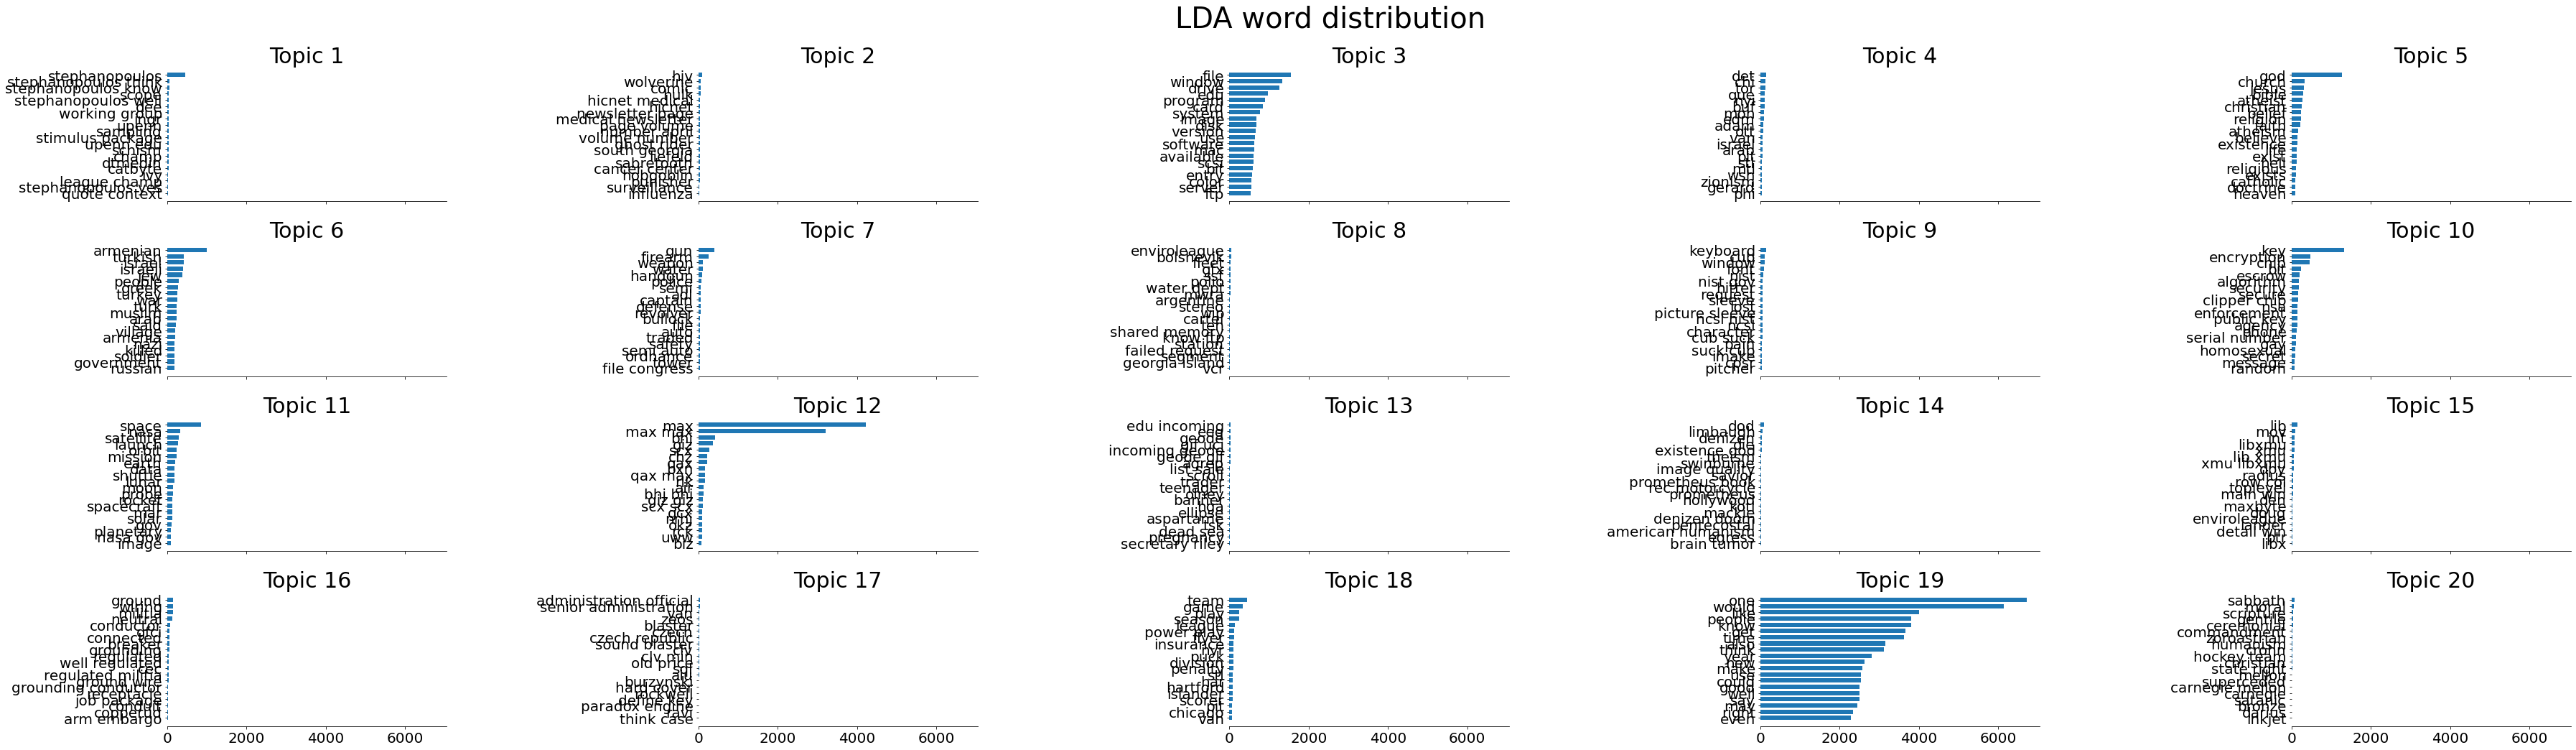

In [39]:
n_top_words = 20
fig, axes = plt.subplots(4, 5, figsize=(60, 15), sharex=True)
axes = axes.flatten()

for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA word distribution', fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()


## Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
mnb = MultinomialNB()

#### X_train = Combination of all the features in a single dataframe, bigram_bow_df, tf_idf_df, lda_features_df and wordtovecDF
 

In [50]:
y_train = newsgroups_train_df['target']

In [59]:
#mnb.fit(X_train, y_train)

In [60]:
## Next step is to combine all the dataframes. Features of X_train is too large, maybe we need to have some kind of feature selection